# 서울의 노른자, 2호선 내부 부동산 분석!
------

## 0. 서론   
- 주제 선정   

    - 부동산 데이터 분석 프로젝트를 진행하기 위해 분석 방향성을 생각해보던 중, 서울의 부동산은 2호선의 안과 밖으로 나뉜다는 주제로 대화했던 것이 생각나서 분석을 해보고자 이 프로젝트를 진행하게 되었다.
    
- 사용 데이터
    - 서울시 부동산 정보 데이터
    - 서울시 자치구 경계 데이터
    - 지하철 2호선 역위치 데이터
    - 거시경제지표 데이터

## 1. 부동산의 가격과 연관이 있는 지표
#### ✅ 부동산 가격에 영향을 주는 주요 거시경제 지표    
1. 금리 (Interest Rate)
기준금리 (한국은행 기준금리)   
→ 금리가 오르면 대출이자 부담 증가 → 주택 구매 수요 감소 → 부동산 가격 하락 가능   
→ 반대로 금리가 낮아지면 대출이 쉬워지고, 부동산 수요 증가   

2. 인플레이션 (Inflation)   
소비자물가지수(CPI, Consumer Price Index)   
→ 물가가 오르면 실질소득 감소 → 주택 구매력 하락   
→ 하지만 인플레이션 시 부동산이 헤지(hedge) 수단으로 여겨져, 가격이 오를 수도 있음   
<br>
생산자물가지수(PPI, Producer Price Index)   
→ 건축 자재 비용 상승 시 신규 주택 공급 비용 증가 → 부동산 가격 상승 가능   

3. 금융시장 지표   
주식시장 지수 (코스피, 코스닥)   
→ 주식시장이 호황이면 투자심리 개선 → 부동산 시장도 자금 유입 증가   
→ 반대로 주식시장이 불안하면, 안전자산(부동산) 선호 증가 가능   

4. 부동산 시장 관련 지표
주택 매매/전세 가격지수 (KB부동산, 한국부동산원 등)   
→ 기존 주택 가격의 상승/하락 추세 분석   
미분양주택수수

5. 대외 경제 지표   
환율 (KRW/USD, KRW/CNY 등)   
→ 환율이 상승(원화 약세)하면 외국인 투자자들이 한국 부동산에 투자할 유인이 증가할 수 있음   
→ 반대로 환율이 하락(원화 강세)하면 해외 자산 투자 선호 증가로 국내 부동산 수요 감소 가능

- ### 실제 데이터를 통한 분석

In [ ]:
eco_df = pd.read_csv('economy.csv', encoding='utf-8')
eco_df.head(1)

- 아파트매매가격지수, 주택매매가격지수 vs 금리

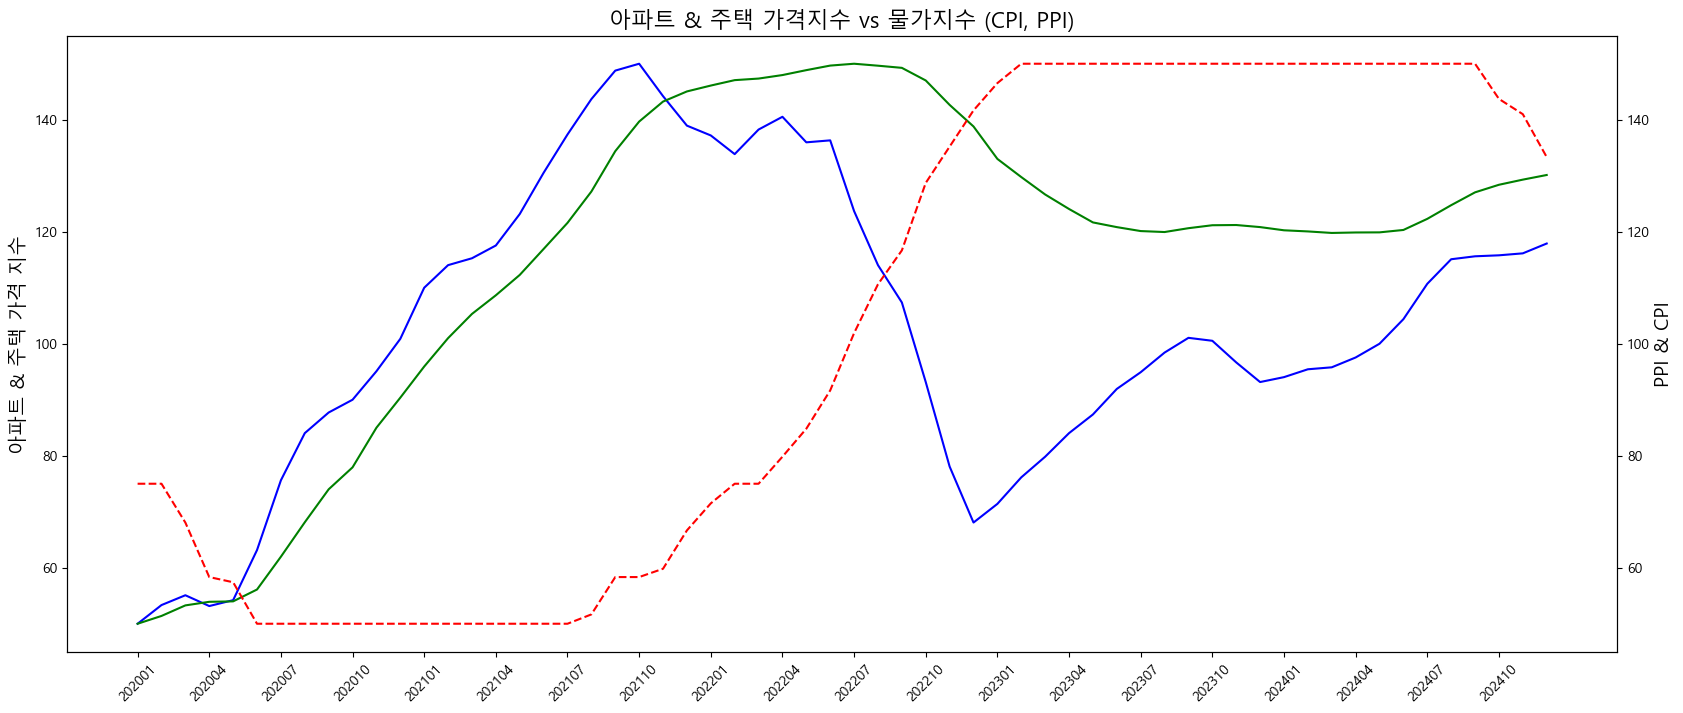

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
data = df.groupby('년월')['아파트 매매 실거래가격지수'].mean()
data2 = df.groupby('년월')['주택매매가격지수(KB)'].mean()
data3 = df.groupby('년월')['한국은행 기준금리'].max()

# 스케일러 초기화 및 적용
scaler = MinMaxScaler(feature_range=(50, 150))  # 스케일을 50~150으로 조정

data_scaled = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
data2_scaled = scaler.fit_transform(data2.values.reshape(-1, 1)).flatten()
data3_scaled = scaler.fit_transform(data3.values.reshape(-1, 1)).flatten()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 8))

# 왼쪽 Y축 (아파트, 주택 가격 지수)
ax1.plot(data_scaled, label="아파트 매매 실거래가격지수", color='b')
ax1.plot(data2_scaled, label="주택매매가격지수(KB)", color='g')
ax1.set_ylabel("아파트 & 주택 가격 지수", fontsize=14)

# X축 눈금 설정: 6개마다 한 번씩
xticks_indices = np.arange(0, len(data), 3)  # 6개마다 한 번씩 인덱스 선택
xticks_labels = data.index[xticks_indices]  # 해당 인덱스에 대응하는 날짜
ax1.set_xticks(xticks_indices)
ax1.set_xticklabels(xticks_labels, rotation=45)

# 오른쪽 Y축 (PPI, CPI)
ax2 = ax1.twinx()  # 보조 Y축 생성
ax2.plot(data3_scaled, label='생산자물가지수 (PPI)', color='r', linestyle='dashed')
ax2.set_ylabel("PPI & CPI", fontsize=14)

plt.title("아파트 & 주택 가격지수 vs 물가지수 (CPI, PPI)", fontsize=16)
plt.show()

- 아파트매매가격지수, 주택매매가격지수 vs 소비자물가지수(CPI), 생산자물가지수(PPI)

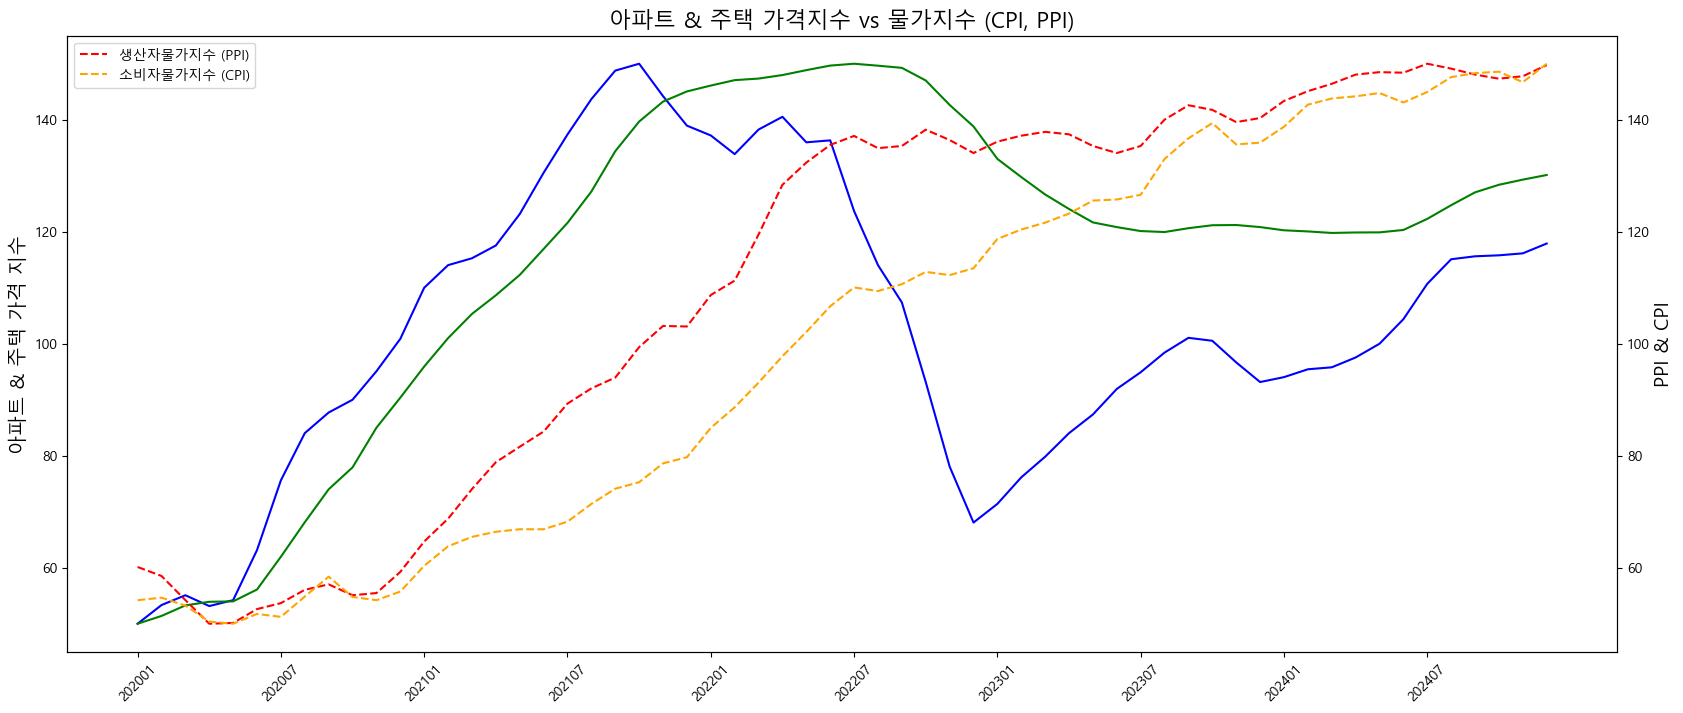

In [ ]:
data = df.groupby('년월')['아파트 매매 실거래가격지수'].max()
data2 = df.groupby('년월')['주택매매가격지수(KB)'].max()
data3 = df.groupby('년월')['생산자물가지수'].max()
data4 = df.groupby('년월')['소비자물가지수'].max()

# 스케일러 초기화 및 적용
scaler = MinMaxScaler(feature_range=(50, 150))  # 스케일을 50~150으로 조정

data_scaled = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
data2_scaled = scaler.fit_transform(data2.values.reshape(-1, 1)).flatten()
data3_scaled = scaler.fit_transform(data3.values.reshape(-1, 1)).flatten()
data4_scaled = scaler.fit_transform(data4.values.reshape(-1, 1)).flatten()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 8))

# 왼쪽 Y축 (아파트, 주택 가격 지수)
ax1.plot(data_scaled, label="아파트 매매 실거래가격지수", color='b')
ax1.plot(data2_scaled, label="주택매매가격지수(KB)", color='g')
ax1.set_ylabel("아파트 & 주택 가격 지수", fontsize=14)

# X축 눈금 설정: 6개마다 한 번씩
xticks_indices = np.arange(0, len(data), 6)  # 6개마다 한 번씩 인덱스 선택
xticks_labels = data.index[xticks_indices]  # 해당 인덱스에 대응하는 날짜
ax1.set_xticks(xticks_indices)
ax1.set_xticklabels(xticks_labels, rotation=45)

# 오른쪽 Y축 (PPI, CPI)
ax2 = ax1.twinx()  # 보조 Y축 생성
ax2.plot(data3_scaled, label='생산자물가지수 (PPI)', color='r', linestyle='dashed')
ax2.plot(data4_scaled, label='소비자물가지수 (CPI)', color='orange', linestyle='dashed')
ax2.set_ylabel("PPI & CPI", fontsize=14)

plt.legend()
plt.title("아파트 & 주택 가격지수 vs 물가지수 (CPI, PPI)", fontsize=16)
plt.show()


- 아파트매매가격지수, 주택매매가격지수 vs 국고채(3년)

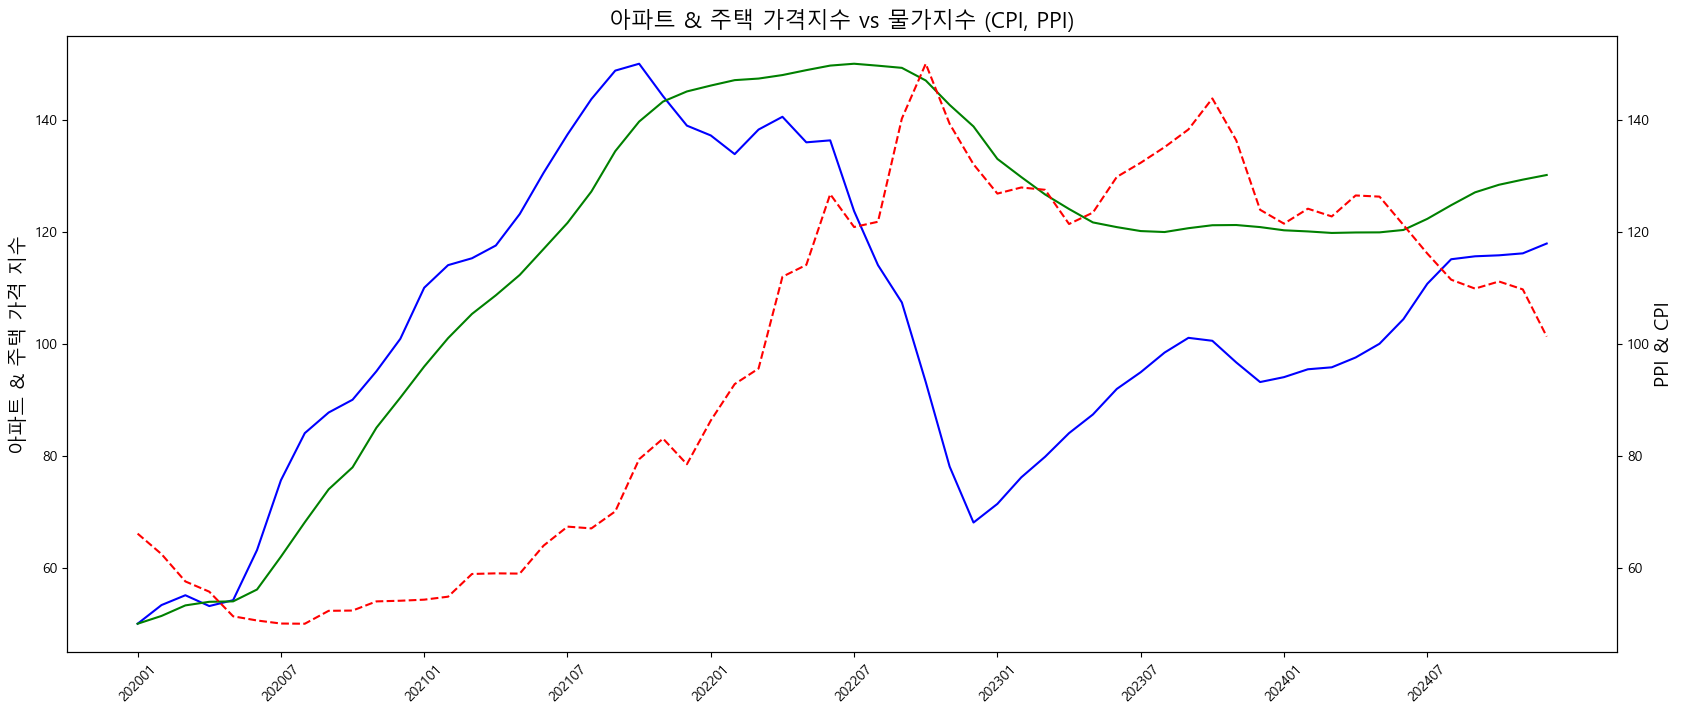

In [ ]:
# 데이터 불러오기
data = df.groupby('년월')['아파트 매매 실거래가격지수'].max()
data2 = df.groupby('년월')['주택매매가격지수(KB)'].max()
data3 = df.groupby('년월')['국고채(3년)'].max()

# 스케일러 초기화 및 적용
scaler = MinMaxScaler(feature_range=(50, 150))  # 스케일을 50~150으로 조정

data_scaled = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
data2_scaled = scaler.fit_transform(data2.values.reshape(-1, 1)).flatten()
data3_scaled = scaler.fit_transform(data3.values.reshape(-1, 1)).flatten()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 8))

# 왼쪽 Y축 (아파트, 주택 가격 지수)
ax1.plot(data_scaled, label="아파트 매매 실거래가격지수", color='b')
ax1.plot(data2_scaled, label="주택매매가격지수(KB)", color='g')
ax1.set_ylabel("아파트 & 주택 가격 지수", fontsize=14)

# X축 눈금 설정: 6개마다 한 번씩
xticks_indices = np.arange(0, len(data), 6)  # 6개마다 한 번씩 인덱스 선택
xticks_labels = data.index[xticks_indices]  # 해당 인덱스에 대응하는 날짜
ax1.set_xticks(xticks_indices)
ax1.set_xticklabels(xticks_labels, rotation=45)

# 오른쪽 Y축 (PPI, CPI)
ax2 = ax1.twinx()  # 보조 Y축 생성
ax2.plot(data3_scaled, label='생산자물가지수 (PPI)', color='r', linestyle='dashed')
ax2.set_ylabel("PPI & CPI", fontsize=14)

plt.title("아파트 & 주택 가격지수 vs 물가지수 (CPI, PPI)", fontsize=16)
plt.show()


### 1.2 금융시장(KOSPI)

- 아파트매매가격지수, 주택매매가격지수 vs KOSPI 지수

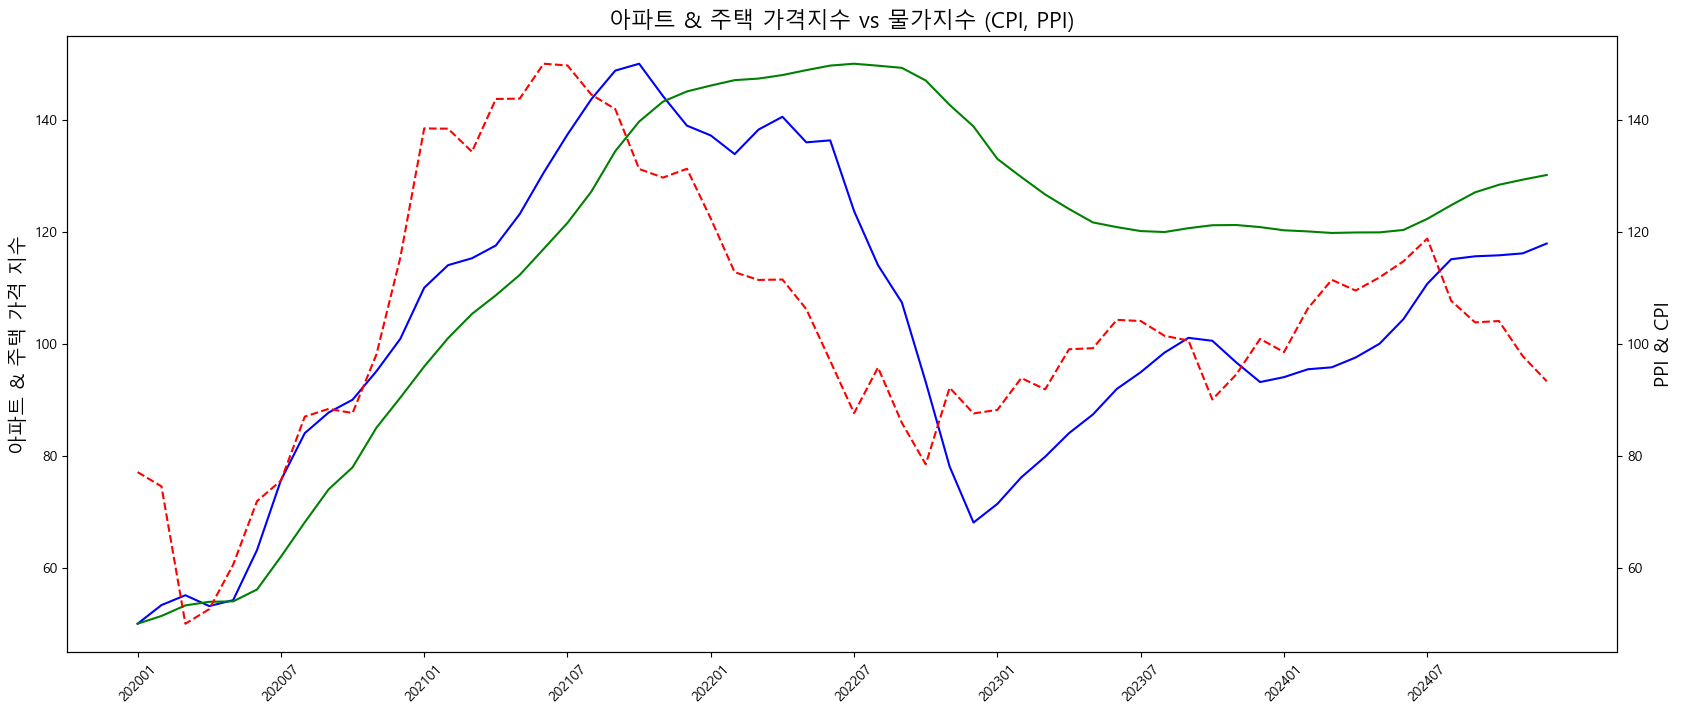

In [ ]:
data = df.groupby('년월')['아파트 매매 실거래가격지수'].max()
data2 = df.groupby('년월')['주택매매가격지수(KB)'].max()
data3 = df.groupby('년월')['KOSPI지수'].max()

# 스케일러 초기화 및 적용
scaler = MinMaxScaler(feature_range=(50, 150))  # 스케일을 50~150으로 조정

data_scaled = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()
data2_scaled = scaler.fit_transform(data2.values.reshape(-1, 1)).flatten()
data3_scaled = scaler.fit_transform(data3.values.reshape(-1, 1)).flatten()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 8))

# 왼쪽 Y축 (아파트, 주택 가격 지수)
ax1.plot(data_scaled, label="아파트 매매 실거래가격지수", color='b')
ax1.plot(data2_scaled, label="주택매매가격지수(KB)", color='g')
ax1.set_ylabel("아파트 & 주택 가격 지수", fontsize=14)

# X축 눈금 설정: 6개마다 한 번씩
xticks_indices = np.arange(0, len(data), 6)  # 6개마다 한 번씩 인덱스 선택
xticks_labels = data.index[xticks_indices]  # 해당 인덱스에 대응하는 날짜
ax1.set_xticks(xticks_indices)
ax1.set_xticklabels(xticks_labels, rotation=45)

# 오른쪽 Y축 (PPI, CPI)
ax2 = ax1.twinx()  # 보조 Y축 생성
ax2.plot(data3_scaled, label='생산자물가지수 (PPI)', color='r', linestyle='dashed')
ax2.set_ylabel("PPI & CPI", fontsize=14)

plt.title("아파트 & 주택 가격지수 vs 물가지수 (CPI, PPI)", fontsize=16)
plt.show()


- 아파트매매가격지수, 주택매매가격지수 vs KOSPI 거래량

In [ ]:
# 아파트지수, 주택지수 vs KOSPI (거래량) < 가능하다면
df.groupby('년월')['아파트 매매 실거래가격지수'].mean()

### 1.3 해외 자본 유입(환율)

- 아파트매매가격지수, 주택매매가격지수 vs 환율

In [18]:
# 아파트지수, 주택지수 vs 환율

### 1.4 글로벌 경제 위기(COVID 19)

In [19]:
# 아파트지수, 주택지수 2019.12 ~ 2020.12

In [ ]:
# 2020, 2021 데이터 병합

In [ ]:
# 거시경제지표 붙이기

In [ ]:
# 필요없는 열 버리기

In [ ]:
# null처리

In [ ]:
# 사용할 데이터 수치화, 원핫인코딩

In [ ]:
# # 카카오API를 사용하여 주소->좌표 변환
# import requests, json

# def get_location(address):
#   url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
#   # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
#   # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
#   headers = {"Authorization": "KakaoAK 'Your API KEY'"}
#   api_json = json.loads(str(requests.get(url,headers=headers).text))
#   print(api_json)
#   address = api_json['documents'][0]['address']
#   crd = {"lat": str(address['y']), "lng": str(address['x'])}

#   return crd

# crd = get_location("노원구 공릉동 747")
# print(crd)

## 2. EDA

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv('dataset/seoul_estate_data.csv', encoding='utf-8-sig')
df.head()

,Unnamed: 0,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,소비자물가지수,아파트 매매 실거래가격지수,주택매매가격지수(KB),주택전세가격지수(KB),면적당 단가,물건금액(만원)_평균,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔
0,0,11380,은평구,10800,역촌동,1.0,대지,26.0,7.0,서원타운,...,100.09,133.0,80.516,82.719,360.417728,22217.500000,0.0,0.0,1.0,0.0
1,1,11620,관악구,10200,신림동,1.0,대지,746.0,43.0,건영1,...,100.09,133.0,80.516,82.719,768.608414,49358.433735,0.0,1.0,0.0,0.0
2,2,11200,성동구,10700,행당동,1.0,대지,377.0,0.0,서울숲더샵,...,100.09,133.0,80.516,82.719,1279.271466,165342.063492,0.0,1.0,0.0,0.0
3,3,11410,서대문구,11900,북가좌동,1.0,대지,459.0,0.0,DMC두산위브,...,100.09,133.0,80.516,82.719,794.491525,78124.242424,0.0,1.0,0.0,0.0
4,4,11260,중랑구,10400,묵동,1.0,대지,167.0,0.0,신도,...,100.09,133.0,80.516,82.719,647.897279,59224.242424,0.0,1.0,0.0,0.0


In [3]:
df.drop(['Unnamed: 0', '자치구코드', '법정동코드', '지번구분', '지번구분명', '건물명', '국고채(1년)', '국고채(5년)', '면적당 단가', '물건금액(만원)_평균', '건물용도_단독다가구', '건물용도_아파트', '건물용도_연립다세대', '건물용도_오피스텔'], axis=1, inplace=True)
# df.drop(['자치구코드', '법정동코드', '지번구분', '지번구분명', '건물명', '국고채(1년)', '국고채(5년)', '면적당 단가', '물건금액(만원)_평균', '건물용도_단독다가구', '건물용도_아파트', '건물용도_연립다세대', '건물용도_오피스텔'], axis=1, inplace=True)

In [4]:
df = df[df['건물용도'] != '단독다가구']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502223 entries, 0 to 535152
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   자치구명            502223 non-null  object 
 1   법정동명            502223 non-null  object 
 2   본번              502171 non-null  float64
 3   부번              502171 non-null  float64
 4   계약일             502223 non-null  object 
 5   물건금액(만원)        502223 non-null  int64  
 6   건물면적(㎡)         502223 non-null  float64
 7   층               502223 non-null  float64
 8   건축년도            499241 non-null  float64
 9   건물용도            502223 non-null  object 
 10  KOSPI지수         502223 non-null  float64
 11  거래량(주식시장, 잠정치)  502223 non-null  float64
 12  국고채(3년)         502223 non-null  float64
 13  원/미국달러(매매기준율)   502223 non-null  float64
 14  한국은행 기준금리       502223 non-null  float64
 15  M2 경제주체별 보유현황   502223 non-null  float64
 16  생산자물가지수         502223 non-null  float64
 17  소비자물가지수        

In [6]:
df.isnull().sum()

자치구명                 0
법정동명                 0
본번                  52
부번                  52
계약일                  0
물건금액(만원)             0
건물면적(㎡)              0
층                    0
건축년도              2982
건물용도                 0
KOSPI지수              0
거래량(주식시장, 잠정치)       0
국고채(3년)              0
원/미국달러(매매기준율)        0
한국은행 기준금리            0
M2 경제주체별 보유현황        0
생산자물가지수              0
소비자물가지수              0
아파트 매매 실거래가격지수       0
주택매매가격지수(KB)         0
주택전세가격지수(KB)         0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

자치구명              0
법정동명              0
본번                0
부번                0
계약일               0
물건금액(만원)          0
건물면적(㎡)           0
층                 0
건축년도              0
건물용도              0
KOSPI지수           0
거래량(주식시장, 잠정치)    0
국고채(3년)           0
원/미국달러(매매기준율)     0
한국은행 기준금리         0
M2 경제주체별 보유현황     0
생산자물가지수           0
소비자물가지수           0
아파트 매매 실거래가격지수    0
주택매매가격지수(KB)      0
주택전세가격지수(KB)      0
dtype: int64

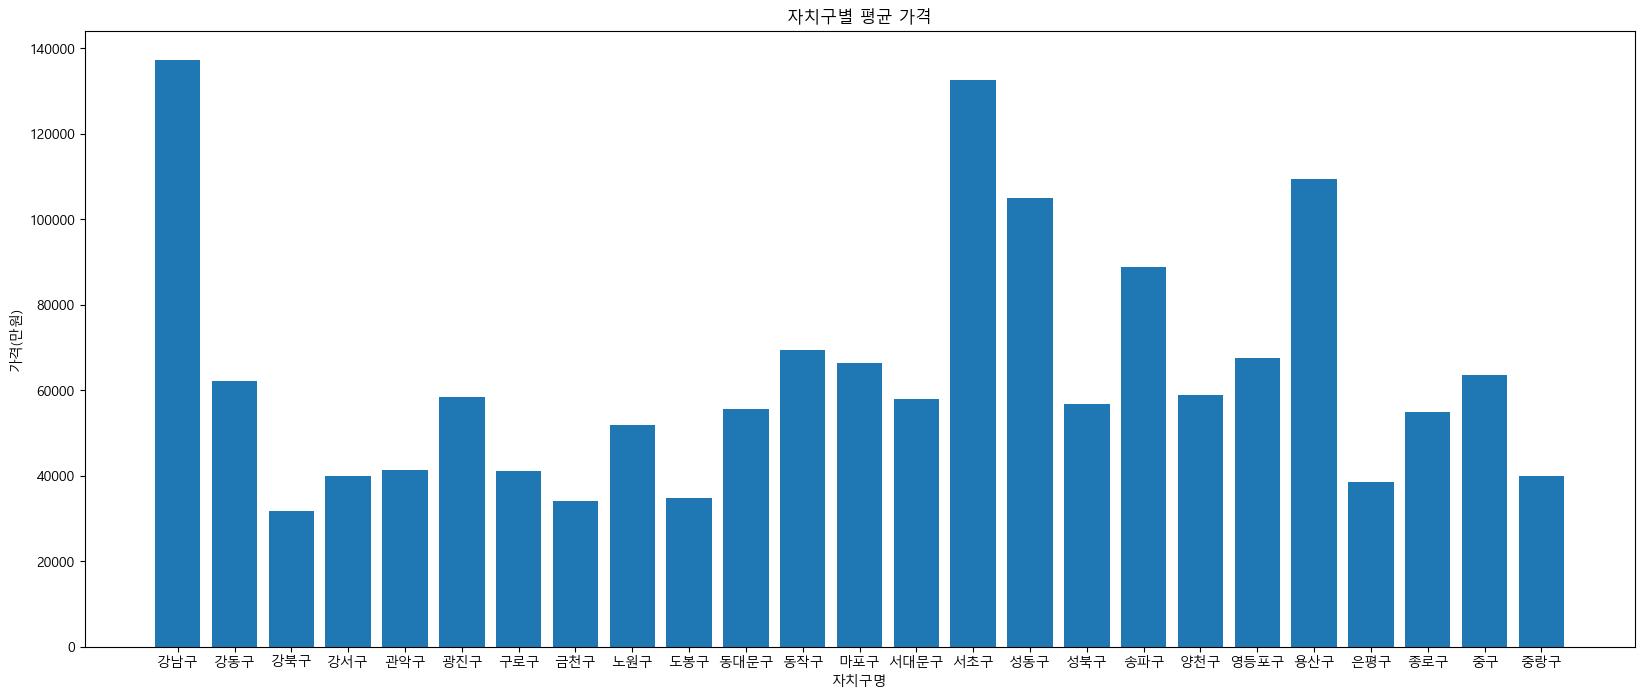

In [8]:
# 평균가격 (전체)
data = df.groupby('자치구명')['물건금액(만원)'].mean()

plt.figure(figsize=(20, 8))
plt.bar(data.index, data.values)
plt.title('자치구별 평균 가격')
plt.xlabel('자치구명')
plt.ylabel('가격(만원)')
plt.show()

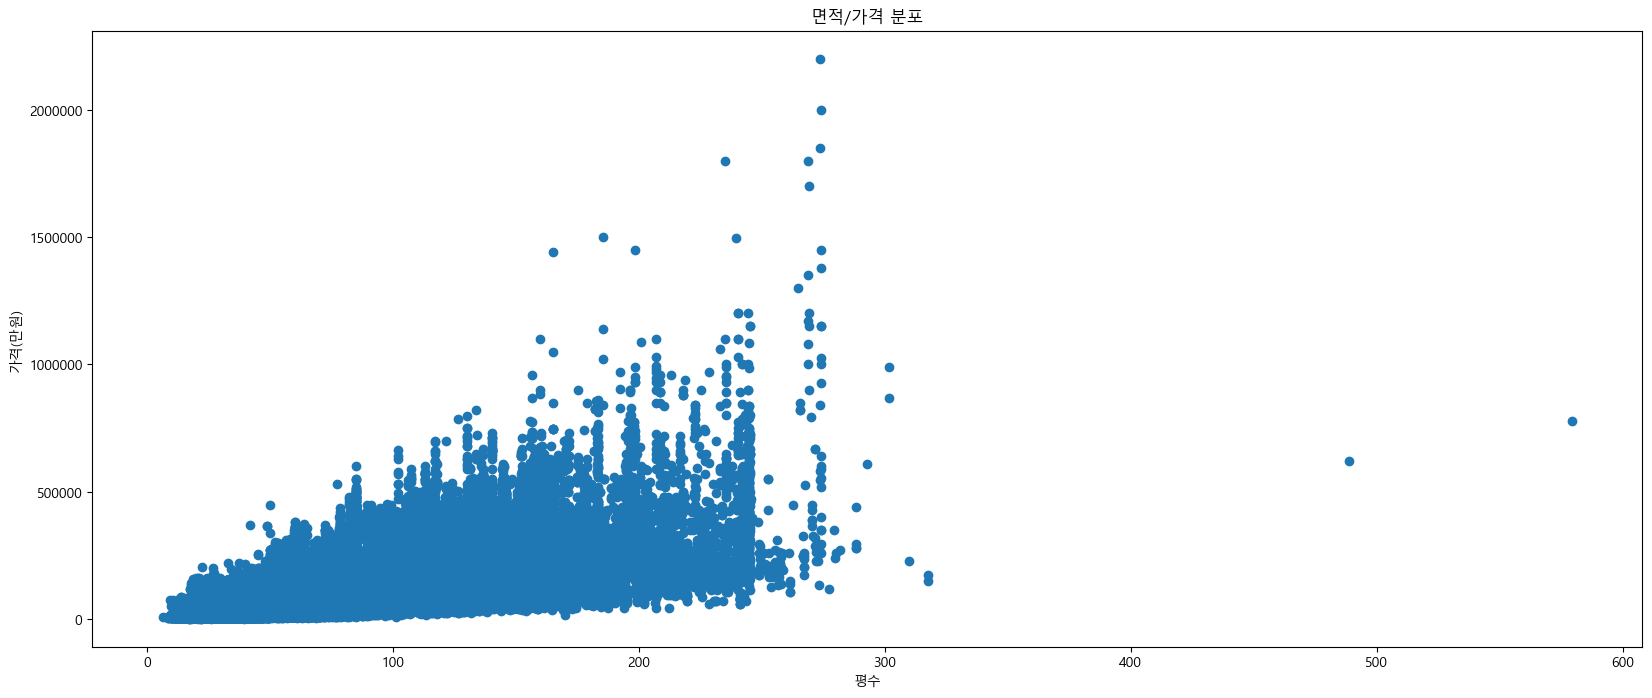

In [9]:
# 평수 / 가격 스캐터
plt.figure(figsize=(20, 8))
plt.scatter(df['건물면적(㎡)'], df['물건금액(만원)'])
plt.title('면적/가격 분포')
plt.xlabel('평수')
plt.ylabel('가격(만원)')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

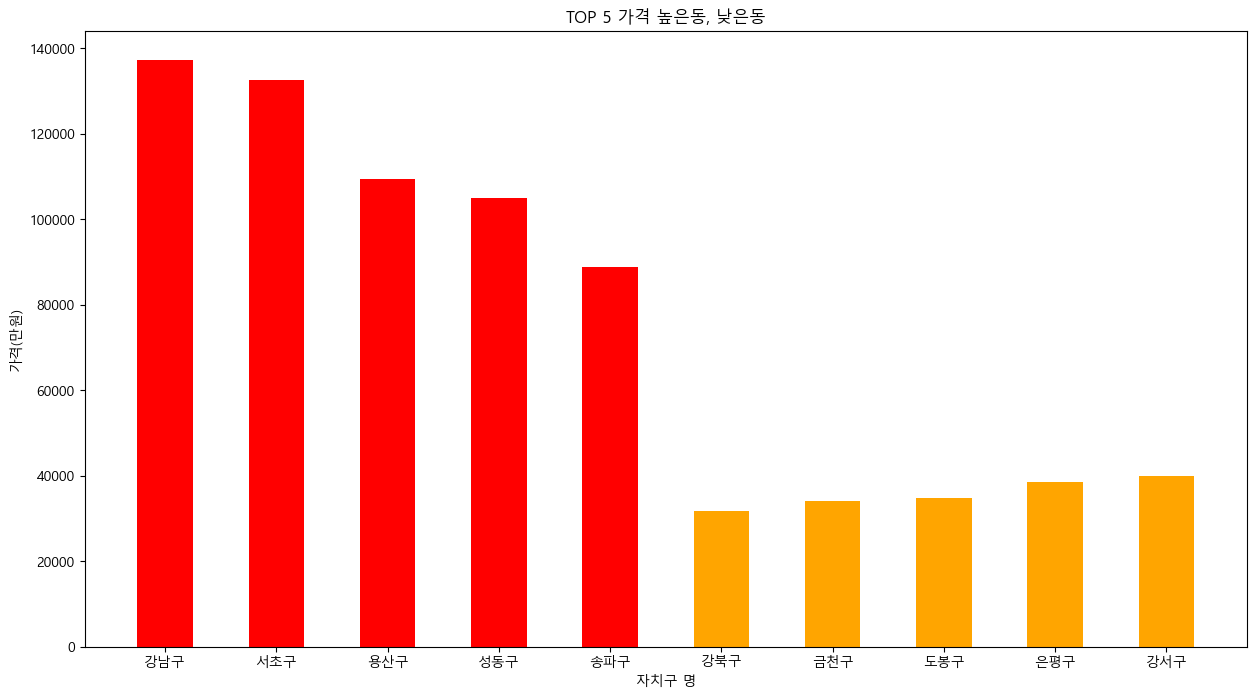

In [10]:
# 가격 비싼 동 TOP 5, 낮은 동 TOP 5
data = df.groupby('자치구명')['물건금액(만원)'].mean().sort_values(ascending=False)[:5]
data2 = df.groupby('자치구명')['물건금액(만원)'].mean().sort_values()[:5]

plt.figure(figsize=(15, 8))
plt.bar(list(data.index), list(data.values), width=0.5, color='red')
plt.bar(list(data2.index), list(data2.values), width=0.5, color='orange')
plt.title('TOP 5 가격 높은동, 낮은동')
plt.xlabel('자치구 명')
plt.ylabel('가격(만원)')
plt.show()

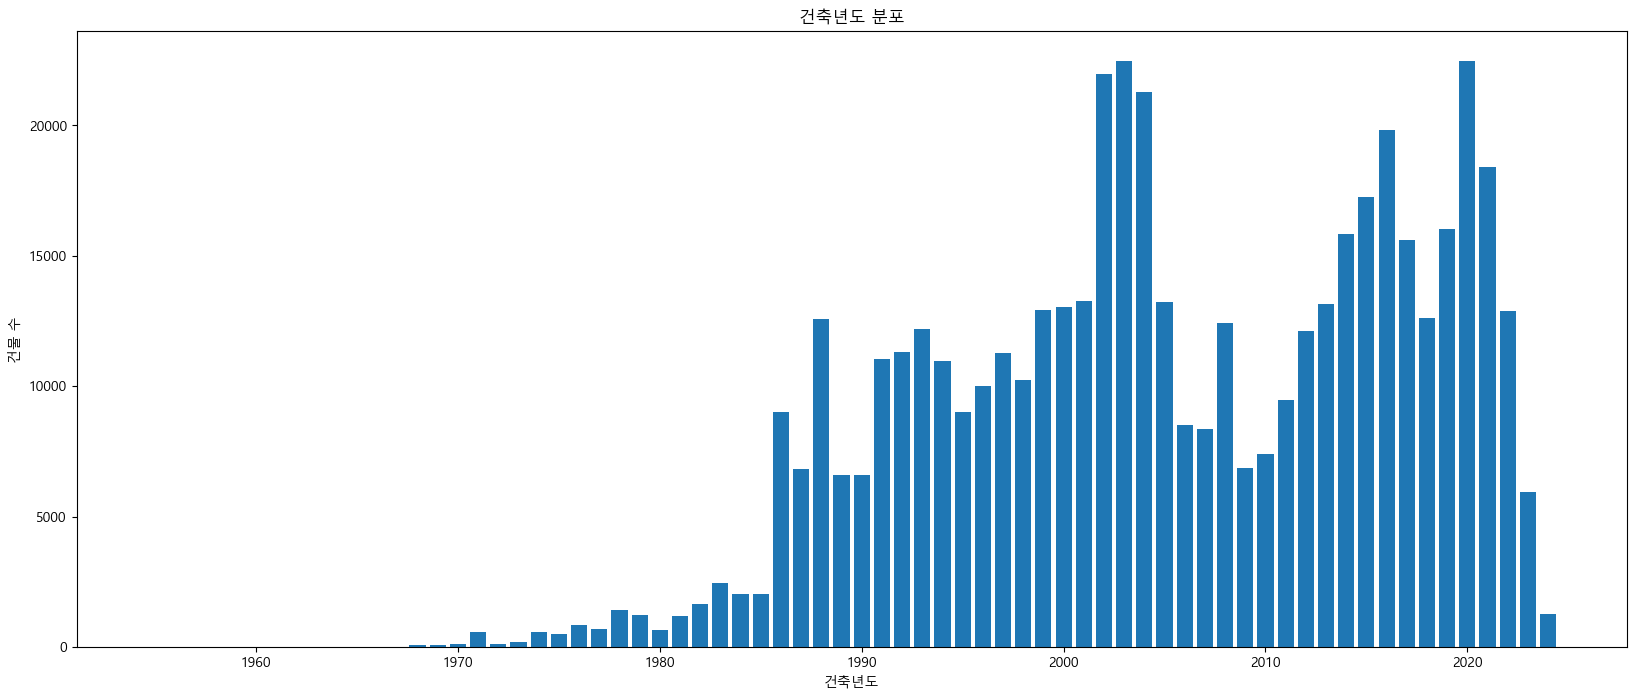

In [11]:
# 신축 vs 구축 비교
data = df[df['건축년도'] > 1950]['건축년도'].value_counts().sort_index()

plt.figure(figsize=(20, 8))
plt.bar(data.index, data.values)
plt.title('건축년도 분포')
plt.xlabel('건축년도')
plt.ylabel('건물 수')
plt.show()

In [12]:
print(f'- 신축 : {df[df['건축년도'] > 2014]['건축년도'].count()}개')
print(f'- 구축 : {df[df['건축년도'] < 2015]['건축년도'].count()}개')

- 신축 : 142384개
- 구축 : 356805개


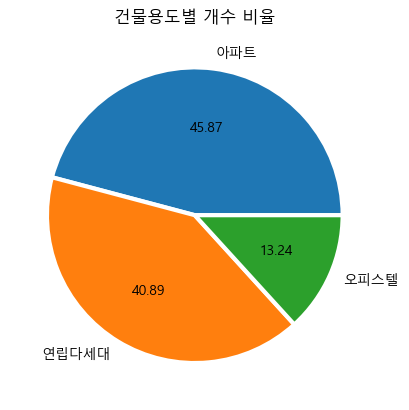

In [13]:
data = df.groupby('건물용도')['건물용도'].count()
plt.pie(data, labels=data.index, autopct='%.2f', wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 3})
plt.title('건물용도별 개수 비율')
plt.show()

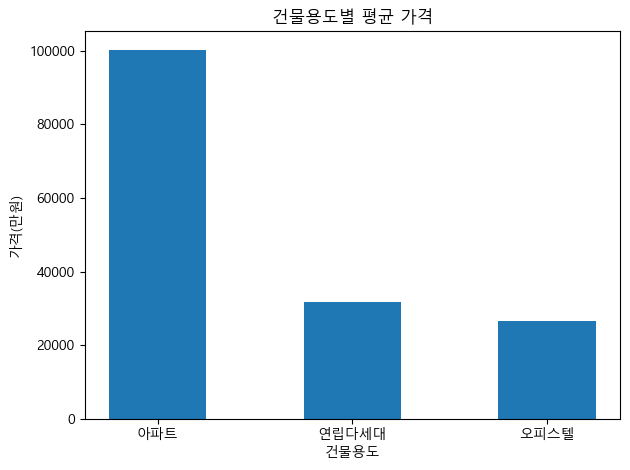

In [14]:
# 건물용도별 평균 가격
data = df.groupby('건물용도')['물건금액(만원)'].mean()

plt.bar(data.index, data.values, width=0.5)
plt.title('건물용도별 평균 가격')
plt.xlabel('건물용도')
plt.ylabel('가격(만원)')
plt.tight_layout()
plt.show()

## 3. 데이터 전처리

- 자치구명, 법정동명, 본번, 부번을 합쳐서 총주소 열 추가

In [15]:
df['총주소'] = df.apply(lambda x: f"{x['자치구명']} {x['법정동명']} {int(x['본번'])}" + (f"-{int(x['부번'])}" if x['부번'] != 0.0 else ""), axis=1)
df.drop(['법정동명', '본번', '부번'], axis=1, inplace=True)
df['총주소']

0            은평구 역촌동 26-7
1          관악구 신림동 746-43
2             성동구 행당동 377
3           서대문구 북가좌동 459
4              중랑구 묵동 167
               ...       
535147        강남구 대치동 500
535149     서대문구 북아현동 1013
535150      강서구 마곡동 743-4
535151    영등포구 여의도동 13-21
535152        강남구 대치동 670
Name: 총주소, Length: 499189, dtype: object

- 계약일로 년월 추가

In [16]:
# 년월 나누기
df['년월'] = df['계약일'].apply(lambda x:x[:7].replace('-', ''))
df['년도'] = df['년월'].apply(lambda x: x[:4])
df['년월']

0         202001
1         202001
2         202001
3         202001
4         202001
           ...  
535147    202412
535149    202412
535150    202412
535151    202412
535152    202412
Name: 년월, Length: 499189, dtype: object

- 물건금액 * 건물면적으로 면적당 단가 열 추가

In [17]:
df['면적당 단가'] = df.apply(lambda x: x['물건금액(만원)'] / x['건물면적(㎡)'], axis=1)
df.drop(['건물면적(㎡)', '물건금액(만원)'], axis=1, inplace=True)
df['면적당 단가']

0          360.417728
1          768.608414
2         1279.271466
3          794.491525
4          647.897279
             ...     
535147    3678.196901
535149    1860.355587
535150    2002.119892
535151     541.125541
535152    3721.044850
Name: 면적당 단가, Length: 499189, dtype: float64

In [18]:
subway = pd.read_csv('dataset/국가철도공단_수도권2호선_역위치_20240624.csv', encoding='cp949')
subway = subway[['역명', '위도', '경도']]
subway = subway[~subway['역명'].isin(['까치산', '도림천', '양천구청', '신정네거리', '신설동', '용두(동대문구청)', '신답', '용답'])]

address = []
for i in range(len(subway)):
    address.append([subway.iloc[i]['역명'], subway.iloc[i]['위도'], subway.iloc[i]['경도']])

address.append(address[0])
address[16][1] = 37.511581
address[16][2] = 127.08555

coords = [(lat, lon) for _, lat, lon in address]

- 좌표값이 2호선 내부에 위치하면 in 아니면 out

In [19]:
from shapely.geometry import Point, Polygon

check_result = {}

with open('dataset/data.txt', 'r', encoding='utf-8') as f:
    line = f.read().split('\n')
    
polygon = Polygon(coords)

for l in line:
    name, lat, lon = l.split(',')
    point_to_check = Point(lat, lon)  # 서울역의 대략적인 위치

    # 점이 다각형 안에 있는지 확인
    if polygon.contains(point_to_check):
        # print(f"{name} {point_to_check}는 다각형 안에 있습니다.")
        check_result[name.replace('서울 ', '')] = 'in'
    else:
        # print(f"{name} {point_to_check}는 다각형 밖에 있습니다.")
        check_result[name.replace('서울 ', '')] = 'out'

- 내부 외부 구분

In [20]:
df['안밖'] = df['총주소'].map(check_result)
df.dropna(axis=0, inplace=True)
df['안밖'].value_counts()

안밖
out    400463
in      96444
Name: count, dtype: int64

- 층과 건축년도 int로 변경

In [21]:
df['층'] = df['층'].astype('int')
df['건축년도'] = df['건축년도'].astype('int')
df.head(1)

,자치구명,계약일,층,건축년도,건물용도,KOSPI지수,"거래량(주식시장, 잠정치)",국고채(3년),원/미국달러(매매기준율),한국은행 기준금리,...,생산자물가지수,소비자물가지수,아파트 매매 실거래가격지수,주택매매가격지수(KB),주택전세가격지수(KB),총주소,년월,년도,면적당 단가,안밖
0,은평구,2020-01-01,2,2002,연립다세대,2207.211624,64552.094122,1.377901,1163.965752,1.25,...,101.02,100.09,133.0,80.516,82.719,은평구 역촌동 26-7,202001,2020,360.417728,out


## 4. 시각화

- 지하철 데이터로 [역이름, 위도, 경도] 데이터 생성

In [22]:
subway = pd.read_csv('dataset/국가철도공단_수도권2호선_역위치_20240624.csv', encoding='cp949')
subway = subway[['역명', '위도', '경도']]
subway = subway[~subway['역명'].isin(['까치산', '도림천', '양천구청', '신정네거리', '신설동', '용두(동대문구청)', '신답', '용답'])]

address = []
for i in range(len(subway)):
    address.append([subway.iloc[i]['역명'], float(subway.iloc[i]['위도']), float(subway.iloc[i]['경도'])])

address.append(address[0])
address[16][1] = 37.511581
address[16][2] = 127.08555
address[0]

['시청', 37.563534, 126.975271]

- 2호선 경계 지도에 표시

In [23]:
import folium
import json

# 서울시 지도 중심 설정 (위도, 경도)
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# GeoJSON 파일 읽기
with open('dataset/seoul_municipalities_geo.json', 'r', encoding='utf-8') as f:
    geo_data = json.load(f)

# GeoJSON 데이터를 지도에 추가하고, 내부를 파랑색으로 채우기
folium.GeoJson(
    geo_data,
    style_function=lambda feature: {
        'fillColor': 'blue',  # 내부 색상 (파랑색)
        'color': 'black',     # 경계선 색상 (검정색)
        'weight': 1,          # 경계선 두께
        'fillOpacity': 0.2    # 내부 채우기 투명도
    }
).add_to(seoul_map)

# 각 역을 지도에 마커로 표시하고, 역을 선으로 이어줍니다.
coords = [(lat, lon) for _, lat, lon in address]

# 역 마커 추가
for name, lat, lon in address:
    folium.Marker([lat, lon], popup=name, tooltip=name, icon=folium.Icon(color='green', icon='star')).add_to(seoul_map)

# 역들을 선으로 이어줌 (PolyLine 사용)
folium.PolyLine(coords, color='green', weight=10.5, opacity=1).add_to(seoul_map)

# 지도 출력
seoul_map

- 2호선 안과 밖의 자치구 정보

In [24]:
print('2호선 안쪽 자치구 :', list(df[df['안밖'] == 'in']['자치구명'].value_counts().index))
print('2호선 바깥쪽 자치구 :', list(df[df['안밖'] == 'out']['자치구명'].value_counts().index))

2호선 안쪽 자치구 : ['동작구', '영등포구', '용산구', '마포구', '서초구', '성동구', '강남구', '관악구', '중구', '광진구', '송파구']
2호선 바깥쪽 자치구 : ['강서구', '은평구', '송파구', '구로구', '노원구', '강동구', '양천구', '도봉구', '성북구', '강북구', '중랑구', '강남구', '동대문구', '금천구', '서대문구', '관악구', '마포구', '서초구', '광진구', '종로구', '영등포구', '성동구', '중구', '동작구']


- 내부 외부 평균 면적당 단가 확인

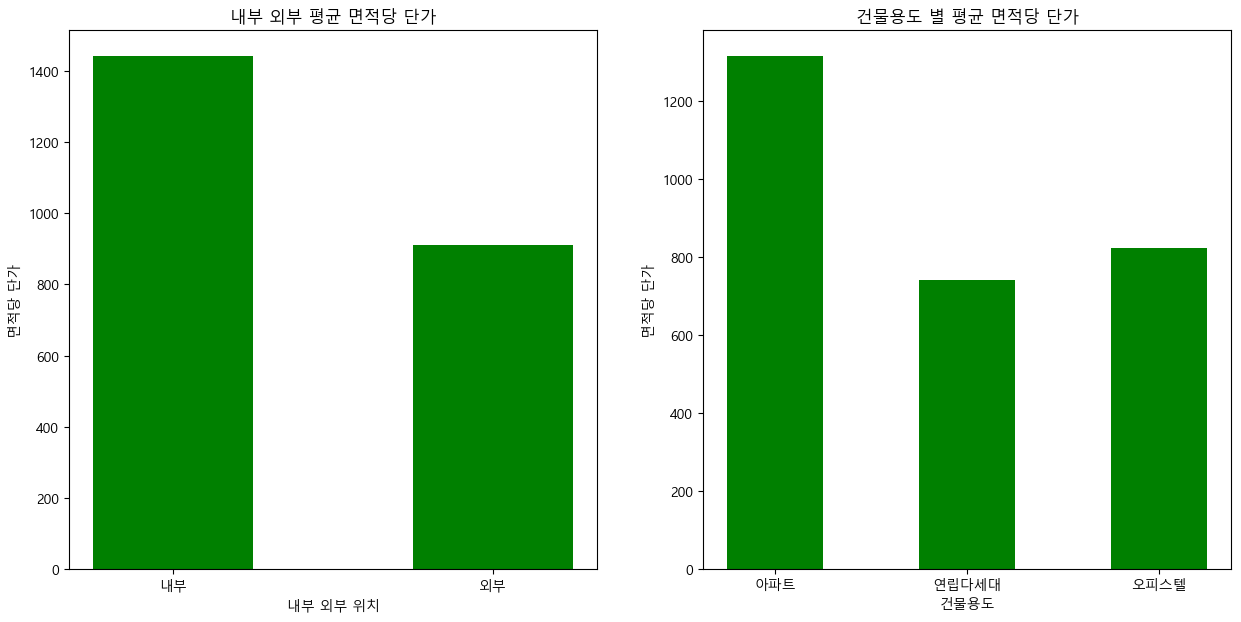

In [25]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.bar(df.groupby('안밖')['면적당 단가'].mean().index, df.groupby('안밖')['면적당 단가'].mean(), width=0.5, color='green')
plt.title('내부 외부 평균 면적당 단가')
plt.xlabel('내부 외부 위치')
plt.xticks([0, 1], labels=['내부', '외부'])
plt.ylabel('면적당 단가')

plt.subplot(122)
plt.bar(df.groupby('건물용도')['면적당 단가'].mean().index, df.groupby('건물용도')['면적당 단가'].mean(), width=0.5, color='green')
plt.title('건물용도 별 평균 면적당 단가')
plt.xlabel('건물용도')
plt.ylabel('면적당 단가')
plt.show()

- 내부 외부 건물용도별 평균 단가 확인

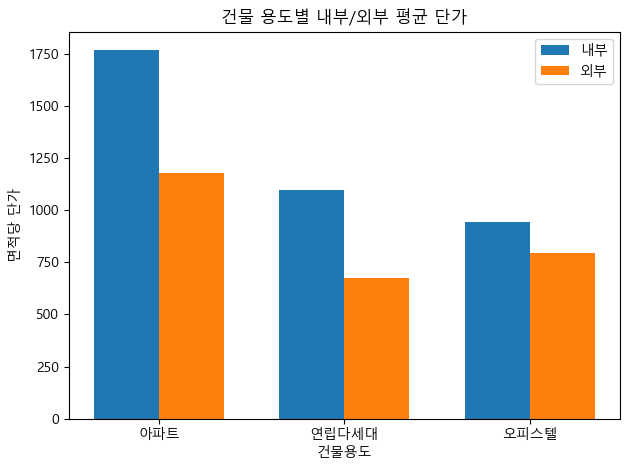

In [26]:
data = df.groupby(['안밖', '건물용도'])['면적당 단가'].mean()
data

x = np.arange(len(df['건물용도'].value_counts().index))
width = 0.35

plt.bar(x - width/2, data[:3], width, label='내부')
plt.bar(x + width/2, data[3:], width, label='외부')

plt.xlabel('건물용도')
plt.ylabel('면적당 단가')
plt.title('건물 용도별 내부/외부 평균 단가')
plt.xticks(x, df['건물용도'].value_counts().index)
plt.legend()

plt.tight_layout()
plt.show()

- 내부 외부 건물용도 비율 확인

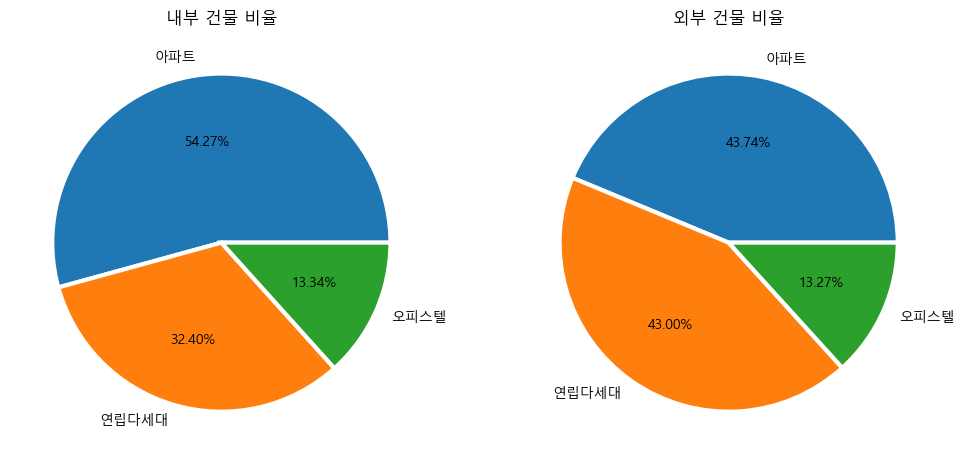

In [68]:
data = df.groupby(['안밖', '건물용도'])['건물용도'].count()

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(data[:3], labels=['아파트', '연립다세대', '오피스텔'], autopct='%.2f%%', wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 3})
plt.title('내부 건물 비율')
plt.subplot(122)
plt.title('외부 건물 비율')
plt.pie(data[3:], labels=['아파트', '연립다세대', '오피스텔'], autopct='%.2f%%', wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 3})
plt.show()

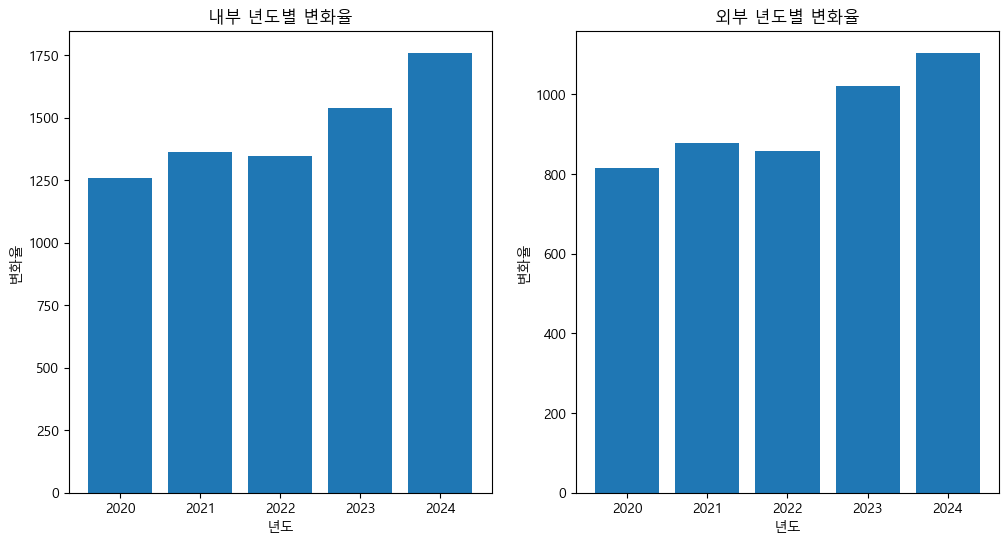

In [65]:
data = df.groupby(['안밖', '년도'])['면적당 단가'].mean()['in']
data2 = df.groupby(['안밖', '년도'])['면적당 단가'].mean()['out']

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(data.index, data.values)
plt.title('내부 년도별 변화율')
plt.xlabel('년도')
plt.ylabel('변화율')

plt.subplot(122)
plt.bar(data2.index, data2.values)
plt.title('외부 년도별 변화율')
plt.xlabel('년도')
plt.ylabel('변화율')
plt.show()

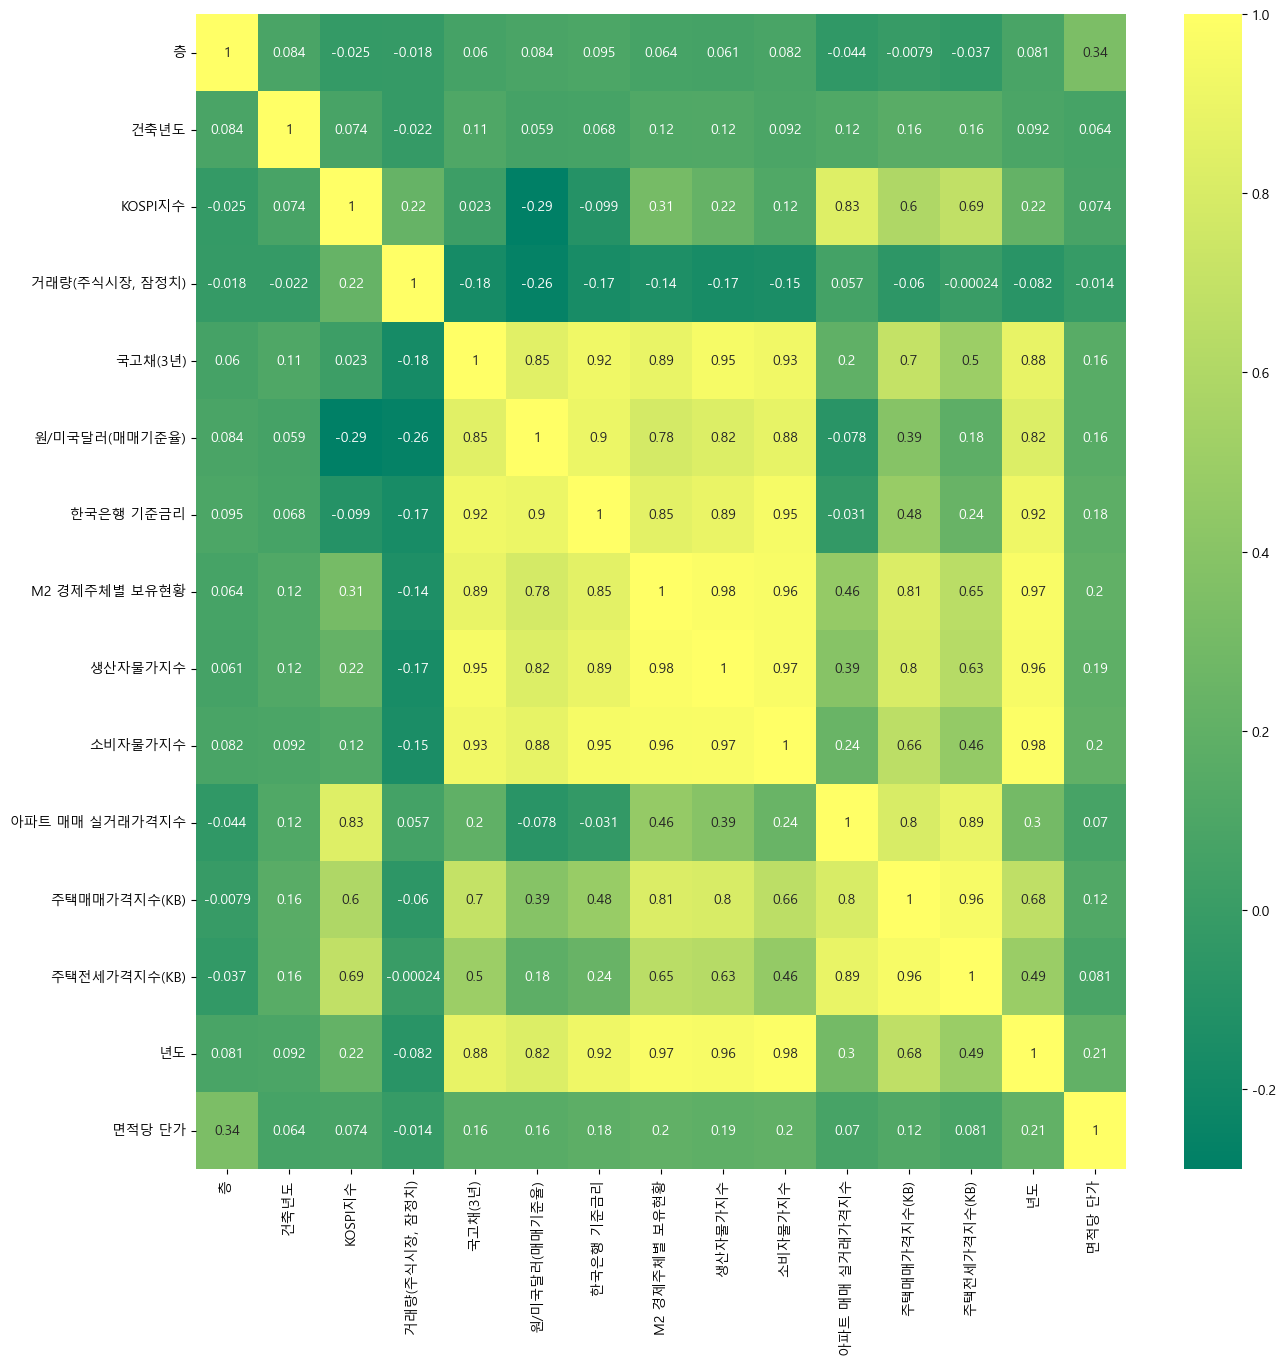

In [64]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.drop(['자치구명', '계약일', '건물용도', '총주소', '년월', '안밖'], axis=1).corr(), annot=True, cmap='summer')
plt.show()

## 5. 머신러닝을 통한 면적당 단가 예측

In [46]:
from sklearn.model_selection import train_test_split

# 다시 train_test_split 실행
X_train, X_test = train_test_split(df, test_size=0.2, stratify=df['자치구명'], random_state=42)

In [47]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
y_test = X_test['면적당 단가']

In [31]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import r2_score, mean_squared_error

label = '면적당 단가'

# 모델 학습 (GPU 활성화)
predictor = TabularPredictor(label=label, path='autogluon_model').fit(
    X_train.drop(['계약일', '총주소', '년월', '안밖'], axis=1)
)

# 예측
X_test_features = X_test.drop(['계약일', '총주소', '년월', '안밖', '면적당 단가'], axis=1)  # 입력 데이터에서 label 제거
predictions = predictor.predict(X_test_features)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       22.43 GB / 31.71 GB (70.7%)
Disk Space Avail:   25.01 GB / 465.29 GB (5.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accura

[1000]	valid_set's rmse: 283.391
[2000]	valid_set's rmse: 278.583
[3000]	valid_set's rmse: 276.111
[4000]	valid_set's rmse: 274.782
[5000]	valid_set's rmse: 273.613
[6000]	valid_set's rmse: 273.11
[7000]	valid_set's rmse: 272.752
[8000]	valid_set's rmse: 272.254
[9000]	valid_set's rmse: 271.884
[10000]	valid_set's rmse: 271.564


	-271.5435	 = Validation score   (-root_mean_squared_error)
	31.39s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 273.861
[2000]	valid_set's rmse: 270.077
[3000]	valid_set's rmse: 268.171
[4000]	valid_set's rmse: 267.83
[5000]	valid_set's rmse: 267.037
[6000]	valid_set's rmse: 266.778
[7000]	valid_set's rmse: 266.687
[8000]	valid_set's rmse: 266.592
[9000]	valid_set's rmse: 266.461
[10000]	valid_set's rmse: 266.665


	-266.3916	 = Validation score   (-root_mean_squared_error)
	25.5s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-273.3876	 = Validation score   (-root_mean_squared_error)
	46.25s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-270.4611	 = Validation score   (-root_mean_squared_error)
	821.6s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-273.1825	 = Validation score   (-root_mean_squared_error)
	23.02s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-292.5807	 = Validation score   (-root_mean_squared_error)
	146.6s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-266.2077	 = Validation score   (-root_mean_squared_error)
	29.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-279.5596	 = Validation score   (-root_mean_squared_error)
	2324.05s	 = Training   runtime
	0.0

[1000]	valid_set's rmse: 267.819
[2000]	valid_set's rmse: 265.113
[3000]	valid_set's rmse: 264.183
[4000]	valid_set's rmse: 264.178


	-263.9397	 = Validation score   (-root_mean_squared_error)
	17.18s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.435, 'XGBoost': 0.217, 'NeuralNetTorch': 0.174, 'RandomForestMSE': 0.13, 'NeuralNetFastAI': 0.043}
	-262.1936	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 3475.62s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 10834.0 rows/s (3976 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("c:\Users\user\Desktop\Estate\autogluon_model")


In [ ]:
TabularPredictor.load('./autogluon_model')

X_test_features = X_test.drop(['면적당 단가'], axis=1)  # 예측할 레이블을 제외한 특성만 사용
predictions = predictor.predict(X_test_features)

In [53]:
# 평가 지표 계산
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"📊 R² Score: {r2:.4f}")
print(f"📉 MSE (Mean Squared Error): {mse:.4f}")

# AutoGluon 평가 결과 확인
performance = predictor.evaluate(X_test)
print("\nAutoGluon Evaluation:", performance)

# # Feature Importance 출력
feature_importance = predictor.feature_importance(X_test)
print("\n🔍 Feature Importance:")
print(feature_importance)

📊 R² Score: 0.8524
📉 MSE (Mean Squared Error): 57858.0724


These features in provided data are not utilized by the predictor and will be ignored: ['계약일', '총주소', '년월', '안밖']
Computing feature importance via permutation shuffling for 16 features using 5000 rows with 5 shuffle sets...



AutoGluon Evaluation: {'root_mean_squared_error': -240.53704993534947, 'mean_squared_error': -57858.0723916008, 'mean_absolute_error': -156.7557230967685, 'r2': 0.8523687046657288, 'pearsonr': 0.9237282068411288, 'median_absolute_error': -105.60614046493117}


	91.26s	= Expected runtime (18.25s per shuffle set)
	29.91s	= Actual runtime (Completed 5 of 5 shuffle sets)



🔍 Feature Importance:
                importance     stddev       p_value  n    p99_high     p99_low
자치구명            380.210847  14.643036  2.634810e-07  5  410.361061  350.060634
건물용도            276.662629   7.631023  6.938567e-08  5  292.375010  260.950249
건축년도            245.275389   7.559376  1.081332e-07  5  260.840248  229.710530
층                61.092339   1.667449  6.652933e-08  5   64.525639   57.659039
아파트 매매 실거래가격지수   16.947773   2.772709  8.298611e-05  5   22.656818   11.238727
KOSPI지수          11.974316   1.761335  5.459094e-05  5   15.600930    8.347702
M2 경제주체별 보유현황    11.425301   2.642125  3.200187e-04  5   16.865473    5.985128
국고채(3년)          10.507248   1.958137  1.382769e-04  5   14.539079    6.475417
거래량(주식시장, 잠정치)    8.541415   1.321592  6.663685e-05  5   11.262592    5.820239
주택매매가격지수(KB)      7.207352   1.165105  7.916901e-05  5    9.606319    4.808386
원/미국달러(매매기준율)     6.958933   1.206171  1.040991e-04  5    9.442456    4.475411
생산자물가지수           5.499642   

#### Feature Importance
- 자치구명, 건물용도, 건축년도, 층은 중요도도 높고 p_value가 낮기 떄문에 예측에 중요한 역할을 한다.     
<br>
- KOSPI지수, 아파트 매매 실거래가격지수, M2 경제주체별 보유현황 등은   
importance가 낮고, p-value가 다소 큰 값을 보이긴 하지만 여전히 예측에 영향을 미치는 특성들이다.   
<br>
- 금리는 중요도는 낮지만 p_value가 다소 높게 나타나므로 통계적으로 중요한 특성일 수 있다.

## 6. 결론   
데이터를 통해 2호선 내부 외부의 부동산을 분석해본 결과, 실제로 내부쪽에 위치한 부동산의 가격이 상당히 높은 것을 알 수 있었다.   
하지만 이것은 아파트, 연립다세대, 오피스텔중 상대적으로 가격대가 높은 아파트의 비율이 내부에 높게 형성되어있는 것도 영향이 있겠지만,   
내부와 외부의 전체 부동산 상승비율은 크게 차이가 나지 않는것으로 확인할 수 있다. 즉 기본적으로 형성되어있는 부동산의 가격때문에 내부가 비싸게 형성되어있다.


- 해야할일   
1. 원본데이터로부터 하기
2. 거시경제지표쪽 정리
3. 시각화쪽 보충